In this notebook I will implemented one full forward pass. The structure to follow will be :

Layer Dense --> ReLU --> Layer_Dense --> Softmax --> Loss

## 1. The Input

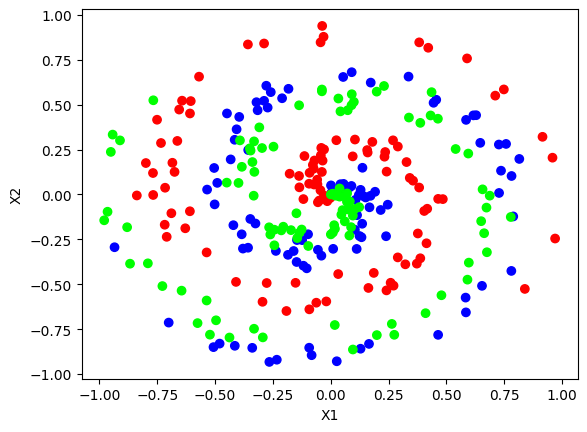

In [89]:
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()

X,y = spiral_data(samples=100,classes=3)

plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [90]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


## 2. Making the Dense Layer

In [101]:
import numpy as np

class Dense_layer:
    def __init__(self,input_shape,no_neurons): # no_neurons is basically the output
        self.weights = np.random.rand(input_shape,no_neurons)  # Initializing the weights (rand function creates a distrubution between 0 and 1)
        self.bias = np.random.rand(no_neurons) # Initializing the biases
    
    def forward(self,inputs):
        
        self.acc_output = np.dot(inputs,self.weights)  

In [120]:
class Activation_Function:
    
    @staticmethod
    def relu(inputs):
        return np.maximum(0,inputs)
    
    @staticmethod  
    def tanh(inputs):
        out1 = ( np.exp(inputs) - np.exp(-inputs)) / (np.exp(inputs) + np.exp(-inputs))
        
        exp_x = np.exp(inputs)
        exp_neg_x = np.exp(-inputs)
        out2 = (exp_x - exp_neg_x) / (exp_x + exp_neg_x)  # Manual tanh formula
        
        out3 = np.tanh(inputs)
        return out1,out2,out3
        

In [121]:
d = Dense_layer(2,4)

d.forward(X)

d.acc_output[:5]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.0086477 , 0.0119356 , 0.01240905, 0.00660751],
       [0.01905389, 0.02623583, 0.02758652, 0.01670221],
       [0.02211573, 0.03030242, 0.03260578, 0.02451377],
       [0.03144984, 0.04312474, 0.04623801, 0.03372913]], dtype=float32)

In [122]:
act = Activation_Function()

out1,out2,act_out = act.tanh(d.acc_output)

In [123]:
out1[:5]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00864751, 0.01193504, 0.01240843, 0.00660739],
       [0.01905158, 0.0262298 , 0.02757954, 0.01670068],
       [0.02211212, 0.03029317, 0.03259422, 0.02450883],
       [0.03143952, 0.04309804, 0.04620508, 0.03371633]], dtype=float32)

In [124]:
out2[:5]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00864751, 0.01193504, 0.01240843, 0.00660739],
       [0.01905158, 0.0262298 , 0.02757954, 0.01670068],
       [0.02211212, 0.03029317, 0.03259422, 0.02450883],
       [0.03143952, 0.04309804, 0.04620508, 0.03371633]], dtype=float32)

In [125]:
act_out[:5]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00864749, 0.01193503, 0.01240841, 0.00660741],
       [0.01905158, 0.02622981, 0.02757953, 0.01670066],
       [0.02211212, 0.03029315, 0.03259423, 0.02450886],
       [0.03143948, 0.04309802, 0.04620508, 0.03371635]], dtype=float32)

## 3. Implementing the SoftMax function

In [138]:
class SoftMax_Mine:
    
    @staticmethod
    def apply(outputs):
        return np.exp(outputs - np.max(outputs,axis=1,keepdims=True)) /  np.sum(np.exp(outputs- np.max(outputs,axis=1,keepdims=True)),axis=1,keepdims=True)    
        

In [134]:
%run 3.Activation_Layers.ipynb

(2, 4)
[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]]
(2, 4)
(300, 2)
(300,)
(2, 3)
(2, 3)
[[0.         0.         0.        ]
 [0.         0.         0.00012475]
 [0.         0.         0.00025709]
 [0.         0.         0.0002559 ]
 [0.         0.         0.00037327]]
[[0.33333334 0.33333334 0.33333334]
 [0.3333131  0.33331382 0.33337313]
 [0.33328262 0.33328345 0.33343393]
 [0.33325994 0.33325908 0.33348092]
 [0.33323216 0.33323133 0.33353645]]
[[inf inf inf]]
[[0.33333334 0.33333334 0.33333334]
 [0.3333131  0.33331382 0.33337313]
 [0.33328265 0.33328348 0.33343393]
 [0.33325997 0.33325908 0.33348095]
 [0.33323216 0.33323136 0.33353645]]


C:\Users\loghi\AppData\Local\Temp\ipykernel_24192\2469880408.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(inputs))  # This can cause an overflow error --> Therefore we subtract with the maximum value for numberical stability --> a^(n - m) = a^n/a^m


In [139]:
obj1 =SoftMax()

In [140]:
obj1.forward(act_out)
print(obj1.output[:5])

[[0.25       0.25       0.25       0.25      ]
 [0.24968646 0.25050867 0.25062728 0.2491776 ]
 [0.24916403 0.25095904 0.25129798 0.24857894]
 [0.248685   0.25072783 0.25130546 0.24928175]
 [0.24820785 0.25111854 0.2519     0.24877362]]


In [141]:
SoftMax_Mine.apply(act_out)[:5]

array([[0.25      , 0.25      , 0.25      , 0.25      ],
       [0.24968646, 0.25050867, 0.25062728, 0.2491776 ],
       [0.24916403, 0.25095904, 0.25129798, 0.24857894],
       [0.248685  , 0.25072783, 0.25130546, 0.24928175],
       [0.24820785, 0.25111854, 0.2519    , 0.24877362]], dtype=float32)